In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Plot Function
The code defines a function called `plot` that takes two parameters: `columns_to_plot` and `df`.
it plot all the selected columns in the data frame

In [81]:
def plot(columns_to_plot, df):
    """
    The function `plot` takes a list of column indices and a DataFrame as input, and plots the specified
    columns over time.
    
    :param columns_to_plot: The `columns_to_plot` parameter is a list of column indices that you want to
    plot from the DataFrame `df`. Each element in the list represents the index of the column you want
    to plot
    :param df: The parameter `df` is a pandas DataFrame that contains the data you want to plot. It
    should have a column named "Zeit" that represents the time values, and other columns that you want
    to plot
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for col_idx in columns_to_plot:
        col_name = df.columns[col_idx]
        plt.plot(df["Zeit"], df.iloc[:, col_idx], label=f"Column {col_name}")

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Columns Over Time")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    #plt.xticks([])  # Hide x-axis tick labels
    #plt.yticks([])  # Hide y-axis tick labels
    plt.tight_layout()
    plt.show()

The `plot_threshold` function is a custom function that plots the values of specified columns in a DataFrame over a specified time range.

In [82]:
def plot_threshold(columns_to_plot, df, start_time, end_time):
    """
    The function `plot_threshold` plots specified columns of a DataFrame within a specified time range.
    
    :param columns_to_plot: The `columns_to_plot` parameter is a list of column indices that you want to
    plot from the DataFrame `df`. Each index corresponds to a specific column in the DataFrame
    :param df: The dataframe containing the data to plot
    :param start_time: The start time is the beginning of the time range you want to plot. It should be
    in the same format as the "Zeit" column in your dataframe
    :param end_time: The `end_time` parameter specifies the end time of the time range for which you
    want to plot the data
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Filter data within the specified time range
    mask = (df["Zeit"] >= start_time) & (df["Zeit"] <= end_time)
    df_filtered = df[mask]

    for col_idx in columns_to_plot:
        col_name = df.columns[col_idx]
        plt.plot(df_filtered["Zeit"], df_filtered.iloc[:, col_idx], label=f"Column {col_name}")

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Columns Over Time")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    #plt.xticks([])  # Hide x-axis tick labels
    #plt.yticks([])  # Hide y-axis tick labels
    plt.tight_layout()
    plt.show()


## Plot All Function
The code defines a function called `plotAll` that takes a data frame as input & Plot all the parameter along the time axis.

In [83]:
def plotAll(data_frame):
    """
    The function `plotAll` takes a data frame as input and plots each column against time in a grid
    layout.
    
    :param data_frame: The parameter `data_frame` is expected to be a pandas DataFrame object. It should
    contain the data that you want to plot. Each column of the DataFrame represents a different variable
    or feature that you want to plot over time. The DataFrame should have a column named "Zeit" which
    represents the time
    """
    num_columns = len(data_frame.columns)
    num_rows = (num_columns + 2) // 3  # Create a grid with 3 columns

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

    for i, col in enumerate(data_frame.columns):
        plt.subplot(num_rows, 3, i + 1)  # Create a subplot
        plt.plot(data_frame["Zeit"], data_frame[col])
        plt.xlabel("Time")  # Set x-axis label to empty string to hide it
        plt.ylabel(col)
        plt.title(f"{col} Over Time")
        plt.grid(True)
        plt.xticks([])  # Hide x-axis tick labels
        plt.yticks([])  # Hide y-axis tick labels

    plt.tight_layout()
    plt.show()

The code defines a function called `convert_to_linear_time` that takes a string representing a date and time as input & convert it into linear Time.

In [84]:
def convert_to_linear_time(date_time_str):
    input_format = "%Y-%m-%d %H:%M:%S.%f"
    dt_object = datetime.strptime(date_time_str, input_format)
    linear_time = dt_object.timestamp()
    
    return linear_time

The code defines a function called `max_threshold` that takes four parameters: `columns_for_max`, `df`, `start_time`, and `end_time`.
The function `max_threshold` takes a list of column indices, a DataFrame, a start time, and an end time, and returns the maximum values for the specified columns within the specified time range.
- A list of `column` indices for which you want to find the maximum or minimun values in the dataframe
- The parameter `df` is a pandas DataFrame that contains the data you want to analyze. It is assumed that the DataFrame has a column named "Zeit" that represents the time values
- The `start time` is the lower bound of the time range you want to filter the dataframe on. It represents the earliest time you want to include in the analysis
- The `end_time` parameter is the maximum time value for which you want to filter the
    data
- `return` a list of maximum values for the specified columns in the given dataframe within the
    specified time range.

In [85]:
def max_threshold(columns, df, start_time, end_time):
    mask = (df["Zeit"] >= start_time) & (df["Zeit"] <= end_time)
    df_filtered = df[mask]

    max_values = []

    for col_idx in columns:
        col_name = df.columns[col_idx]
        max_value = df_filtered[col_name].max()
        max_values.append(max_value)

    return max_values

In [86]:
def min_threshold(columns, df, start_time, end_time):
    mask = (df["Zeit"] >= start_time) & (df["Zeit"] <= end_time)
    df_filtered = df[mask]

    min_values = []

    for col_idx in columns:
        col_name = df.columns[col_idx]
        min_value = df_filtered[col_name].min()
        min_values.append(min_value)

    return min_values

In [87]:
def crop_values(columns, df, start_time, end_time, startvalue, endvalue):
    # Create a mask for the specified time range
    time_mask = (df["Zeit"] >= start_time) & (df["Zeit"] <= end_time)

    # Apply the time mask to the DataFrame
    df_filtered = df[time_mask]

    # Iterate over the specified columns and crop values
    for col_idx in columns:
        col_name = df.columns[col_idx]

        # Crop values within the specified range
        df_filtered.loc[df_filtered[col_name] < startvalue, col_name] = startvalue
        df_filtered.loc[df_filtered[col_name] > endvalue, col_name] = endvalue

    return df_filtered

## load CSV File & Refinement
The code is reading a CSV file named "file.csv" using the pandas library. It skips the first row of the CSV file, assuming it contains headers. The resulting data is stored in a pandas DataFrame called `df`.

In [ ]:
csv_file = "zyk.csv"
df = pd.read_csv(csv_file, skiprows=[1])  # Skip the second row with headers

#print( df.head())

num_rows, num_columns = df.shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")

The code is performing a series of operations on the 'Zeit' column of a DataFrame called 'df'.

In [ ]:
df['Zeit'] = df['Zeit'].apply(convert_to_linear_time)
df['Zeit'] = df['Zeit'] - df['Zeit'].iloc[0]
df['Zeit'] = df['Zeit'] / 3600

The code is retrieving the first and last entry times from a DataFrame column named `Zeit`.

In [ ]:
first_entry_time = df['Zeit'].iloc[0]
last_entry_time = df['Zeit'].iloc[-1]
print(f"Time of First Entry: {first_entry_time} seconds")
print(f"Time of Last Entry: {last_entry_time} seconds")

## Ploting Code
The code is creating a list called `columns_to_plot` which contains the column numbers of the columns you want to plot. It then calls a function called `plot` passing in the `columns_to_plot` list and the `df` dataframe as arguments. The purpose of this code is to plot the specified columns from the dataframe.

In [ ]:
columns_to_plot = [16,15,9]  # Replace with the actual column names you want to plot
plot(columns_to_plot,df)

In [ ]:
columns_to_plot = [16,15,9]  # Replace with the actual column names you want to plot
plot_threshold(columns_to_plot, df, 10, 20)

In [ ]:
columns_to_plot = [16,15,9]  # Replace with the actual column names you want to plot
max_values = max_threshold(columns_to_plot, df, 12, 16)
min_values =min_threshold(columns_to_plot, df, 12, 16)
print("max_values = ",max_values)
print("min_values = ",min_values)

In [ ]:
plotAll(df)

### Plot Ahaku
this will plot data of ahakku 

In [ ]:
columns_to_plot = [9]  # Replace with the actual column no. you want to plot
plot(columns_to_plot,df)

In [88]:
import os
import glob
import pandas as pd

## Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [89]:
folder_path = "data"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []

# Loop through the CSV files and load them into DataFrames
for csv_file in csv_files:
    dfarr = pd.read_csv(csv_file, skiprows=[1])
    dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
    dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
    dfarr['Zeit'] = dfarr['Zeit'] / 3600
    dataframes.append(dfarr)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles = noFiles + 1
print(noFiles)

DataFrame 1 - Rows: 89410, Columns: 18
DataFrame 2 - Rows: 24697, Columns: 18
DataFrame 3 - Rows: 73298, Columns: 18
DataFrame 4 - Rows: 88666, Columns: 18
DataFrame 5 - Rows: 24345, Columns: 18
DataFrame 6 - Rows: 88428, Columns: 18
DataFrame 7 - Rows: 24937, Columns: 18
DataFrame 8 - Rows: 88300, Columns: 18
DataFrame 9 - Rows: 24891, Columns: 18
DataFrame 10 - Rows: 88156, Columns: 18
DataFrame 11 - Rows: 25275, Columns: 18
DataFrame 12 - Rows: 24968, Columns: 18
DataFrame 13 - Rows: 82806, Columns: 18
DataFrame 14 - Rows: 25748, Columns: 18
DataFrame 15 - Rows: 88059, Columns: 18
DataFrame 16 - Rows: 28881, Columns: 18
DataFrame 17 - Rows: 88009, Columns: 18
DataFrame 18 - Rows: 27547, Columns: 18
DataFrame 19 - Rows: 87786, Columns: 18
DataFrame 20 - Rows: 28306, Columns: 18
DataFrame 21 - Rows: 87437, Columns: 18
DataFrame 22 - Rows: 28828, Columns: 18
DataFrame 23 - Rows: 86887, Columns: 18
DataFrame 24 - Rows: 28577, Columns: 18
DataFrame 25 - Rows: 85831, Columns: 18
DataFrame

test that data is loaded succesfully

In [ ]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
#print(f"Type: {dataframes}")

## Plot All Dates
function to take an array of DataFrames and plot the specified columns from each DataFrame in a single plot

In [90]:
def plotAllDates( columns_to_plot,dataframes):
    for df in dataframes:
        for col_idx in columns_to_plot:
            col_name = df.columns[col_idx]
            plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
            plt.plot(df["Zeit"], df.iloc[:, col_idx])
            plt.xlabel("Time")
            plt.ylabel(col_name)
            plt.title(f"Column {col_name} Over Time")
            plt.grid(True)
            #plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
            plt.xticks([])  # Hide x-axis tick labels
            #plt.yticks([])  # Hide y-axis tick labels
            plt.tight_layout()
            plt.show()

### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

Graph No. : 0


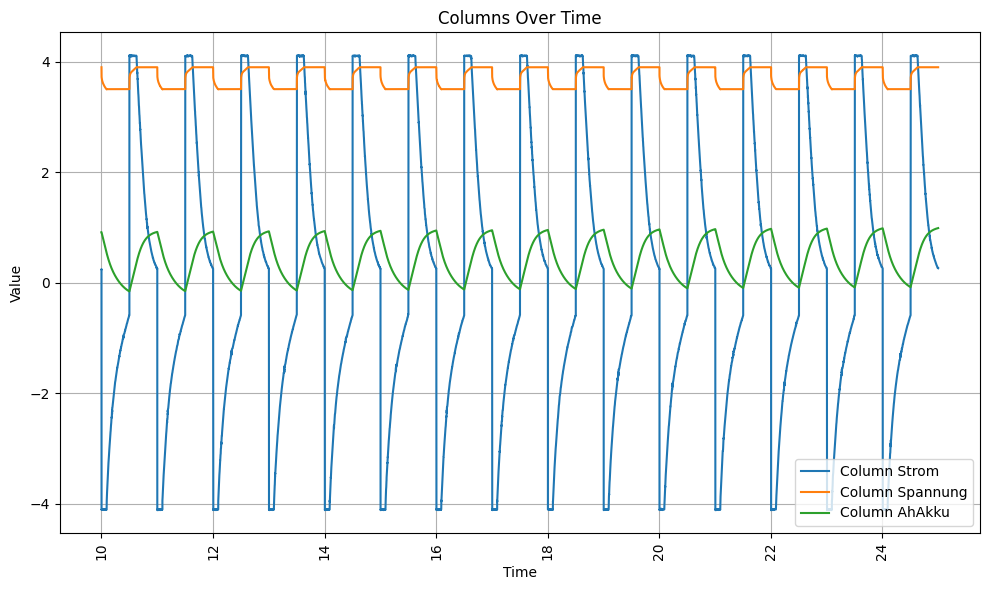

Graph No. : 1


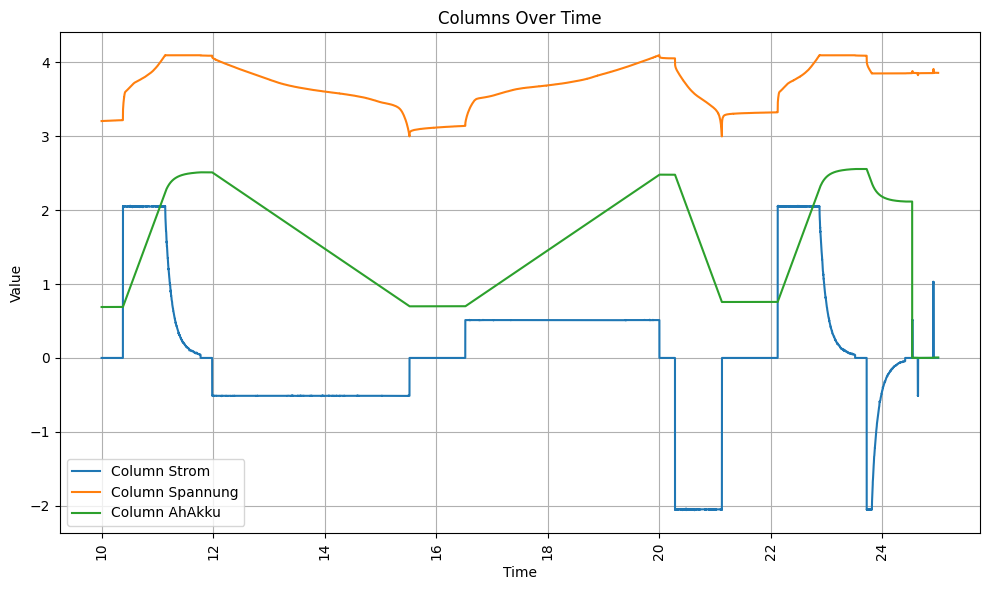

Graph No. : 2


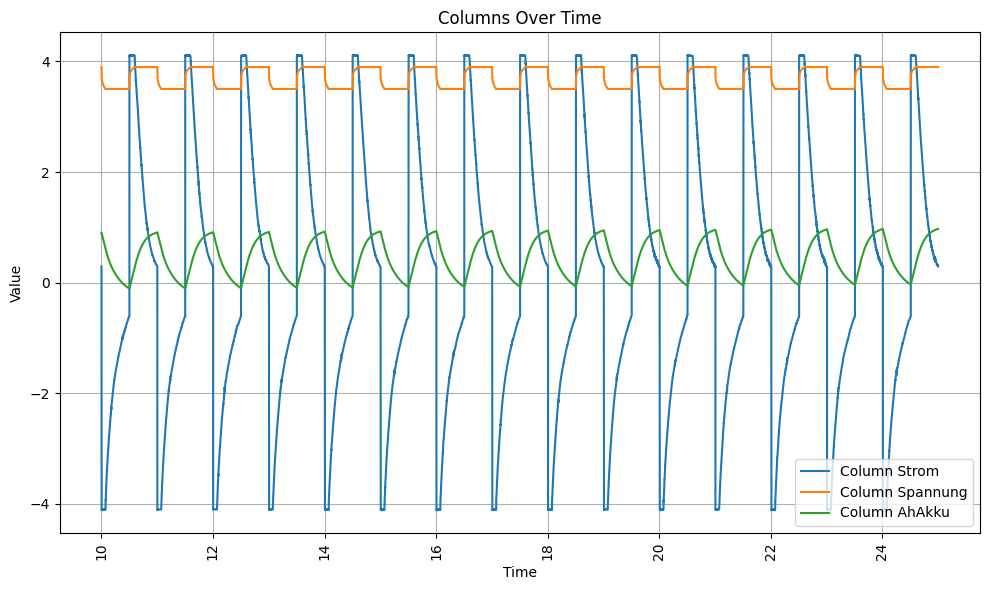

Graph No. : 3


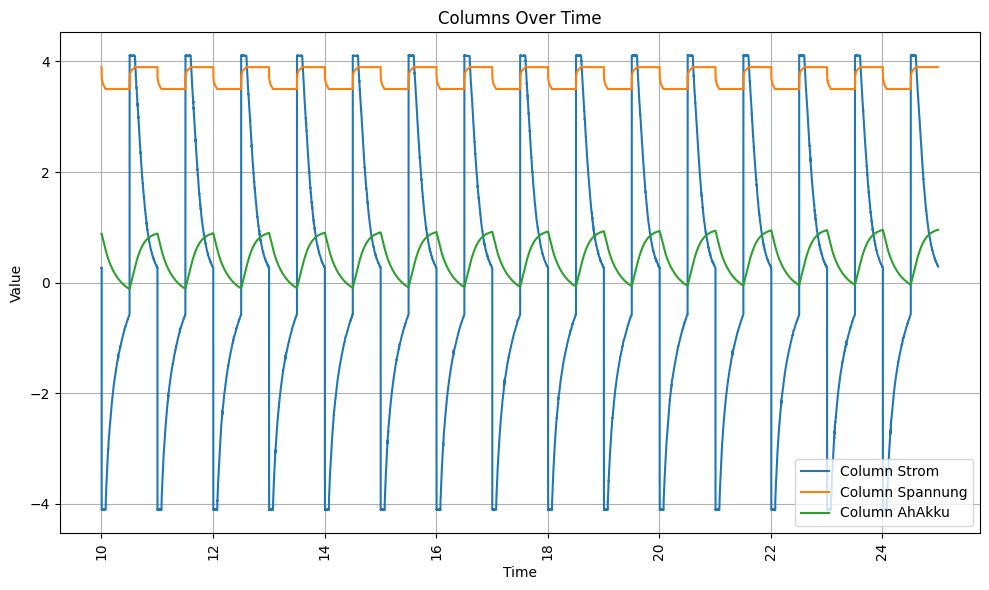

Graph No. : 4


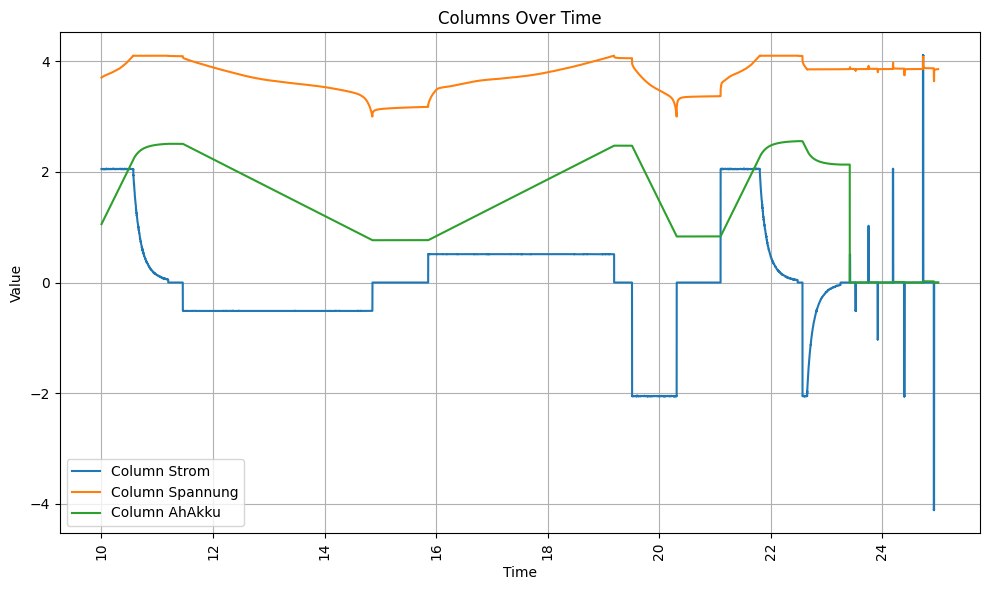

Graph No. : 5


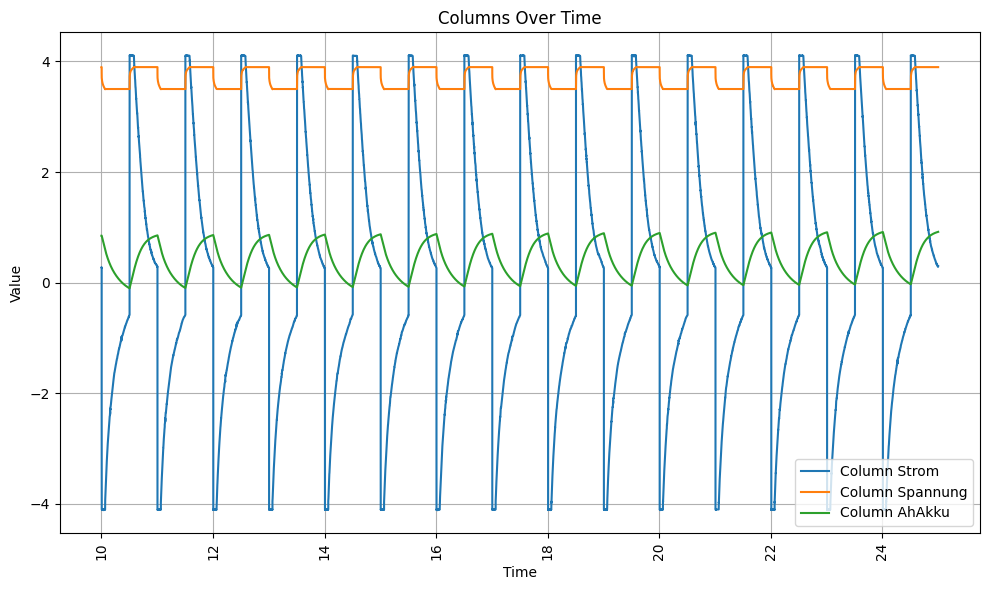

Graph No. : 6


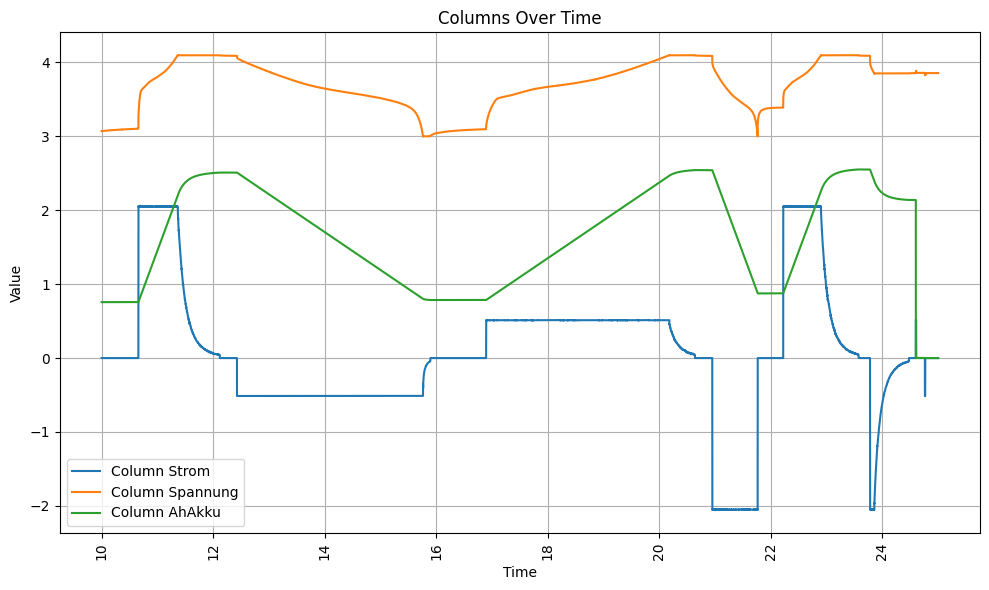

Graph No. : 7


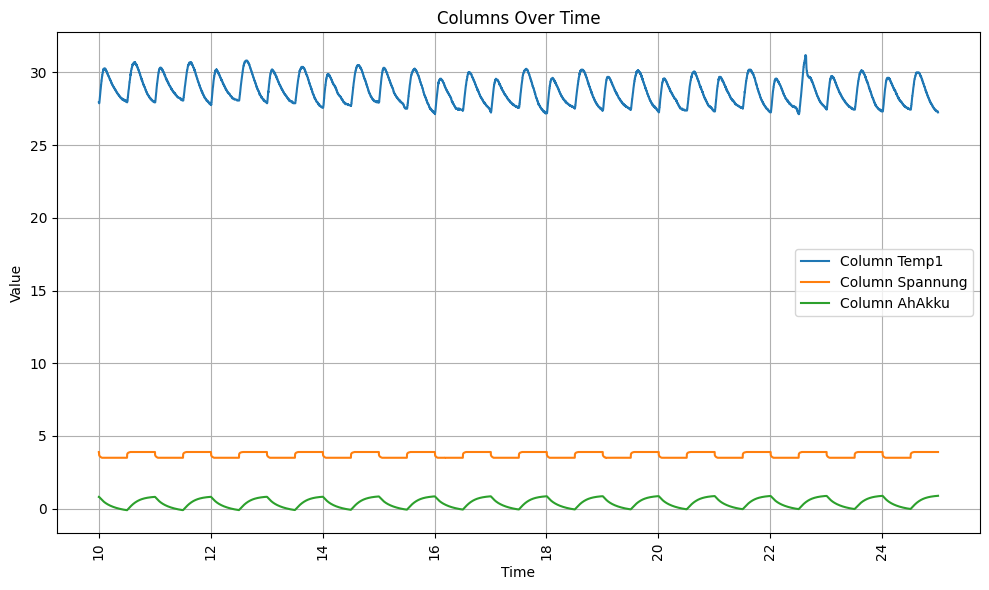

Graph No. : 8


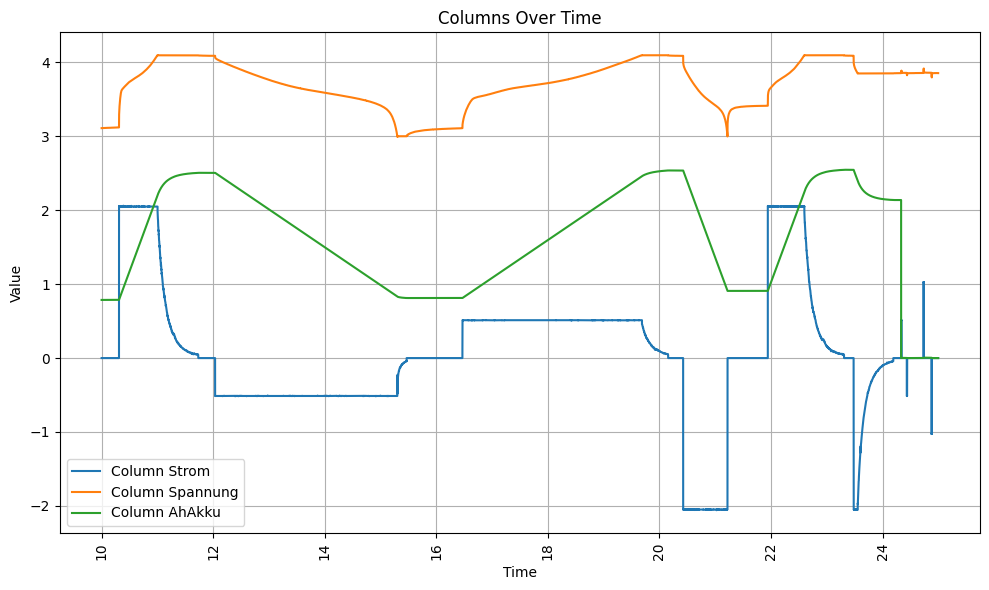

Graph No. : 9


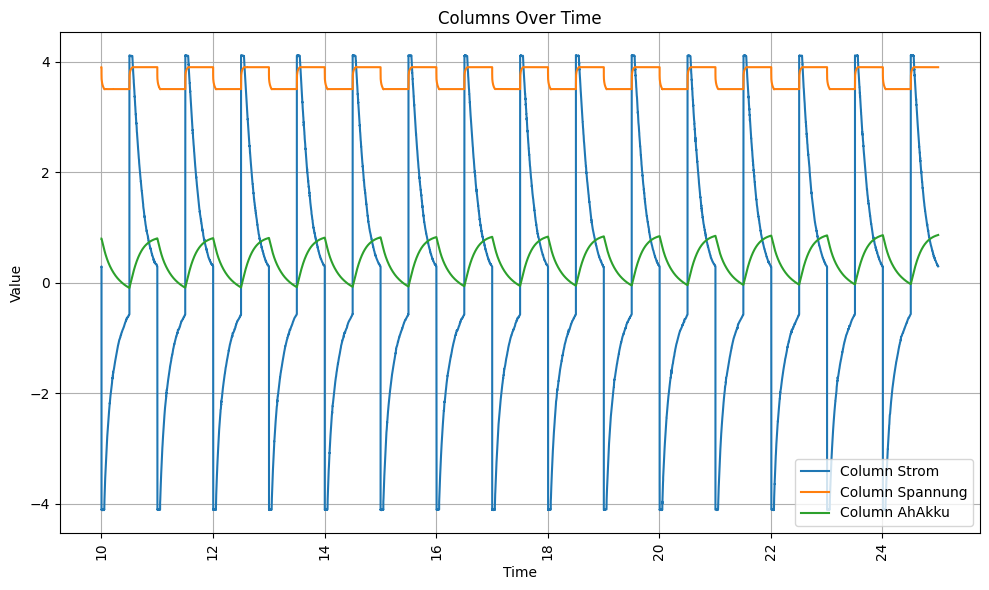

Graph No. : 10


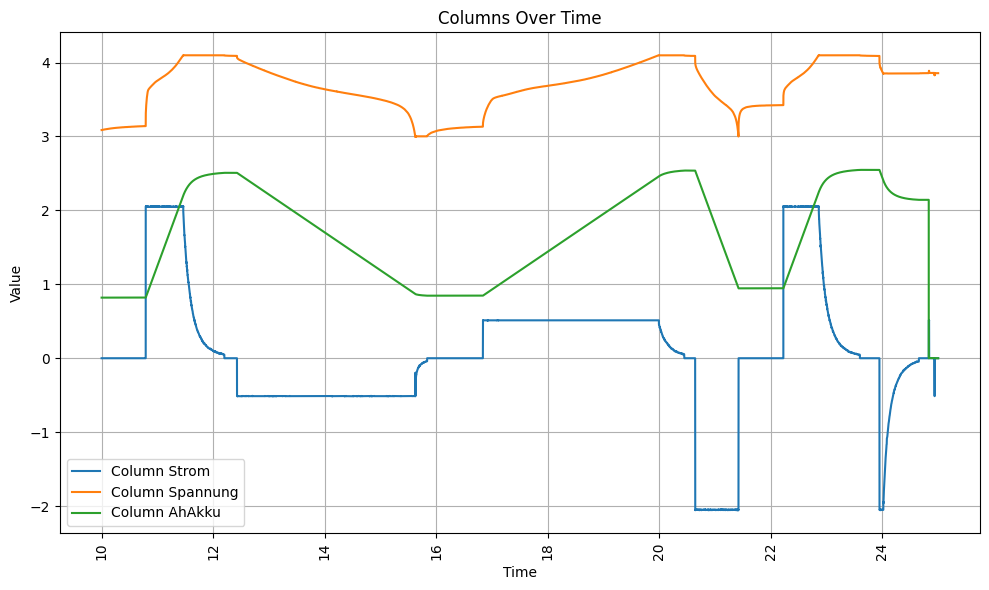

Graph No. : 11


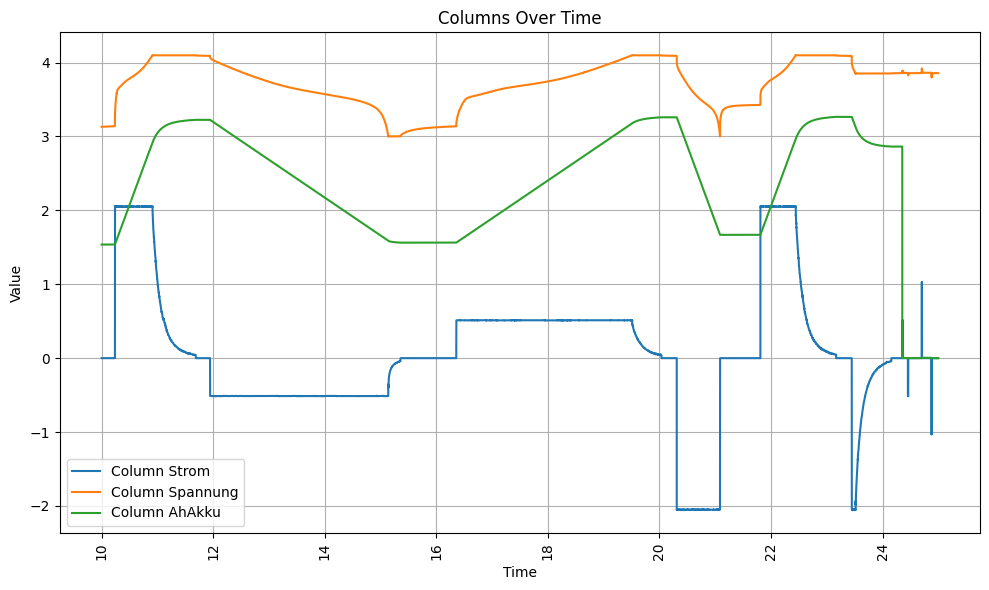

Graph No. : 12


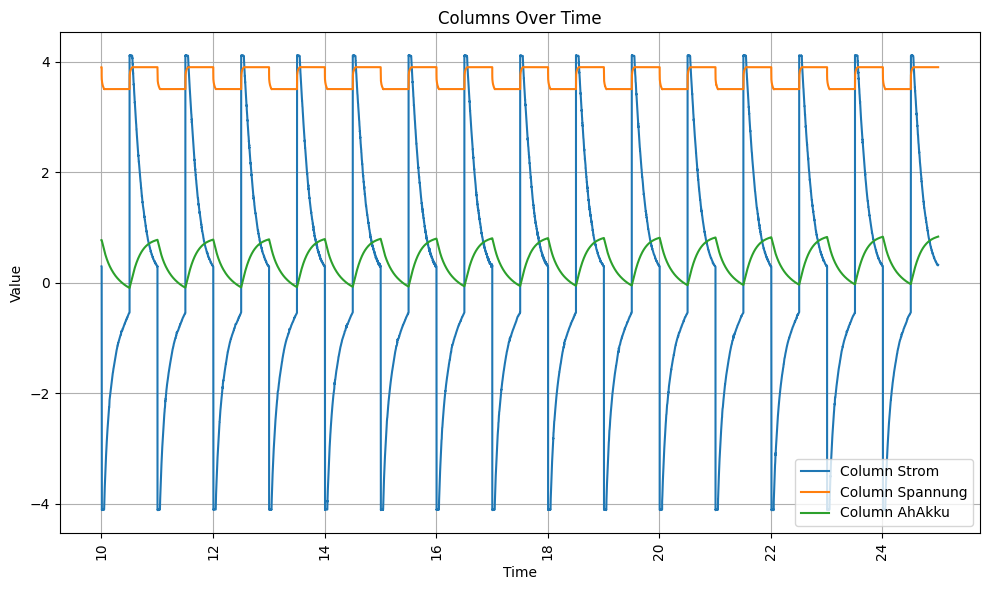

Graph No. : 13


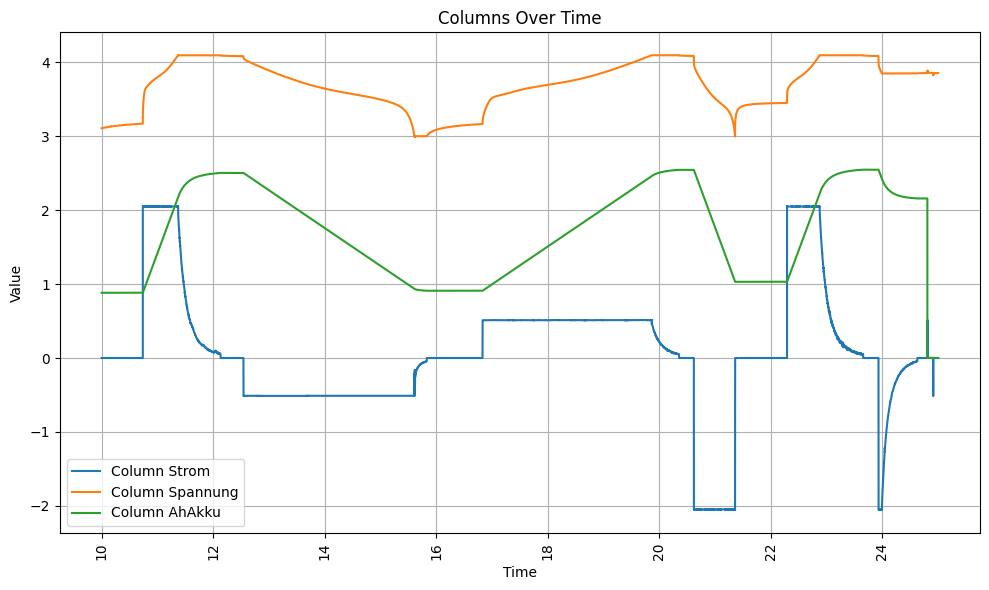

Graph No. : 14


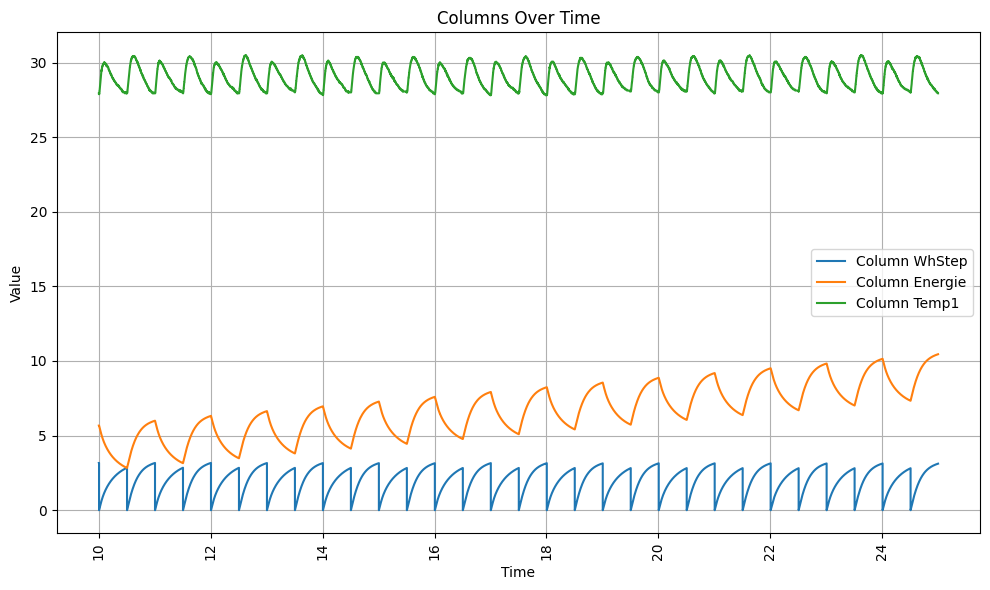

Graph No. : 15


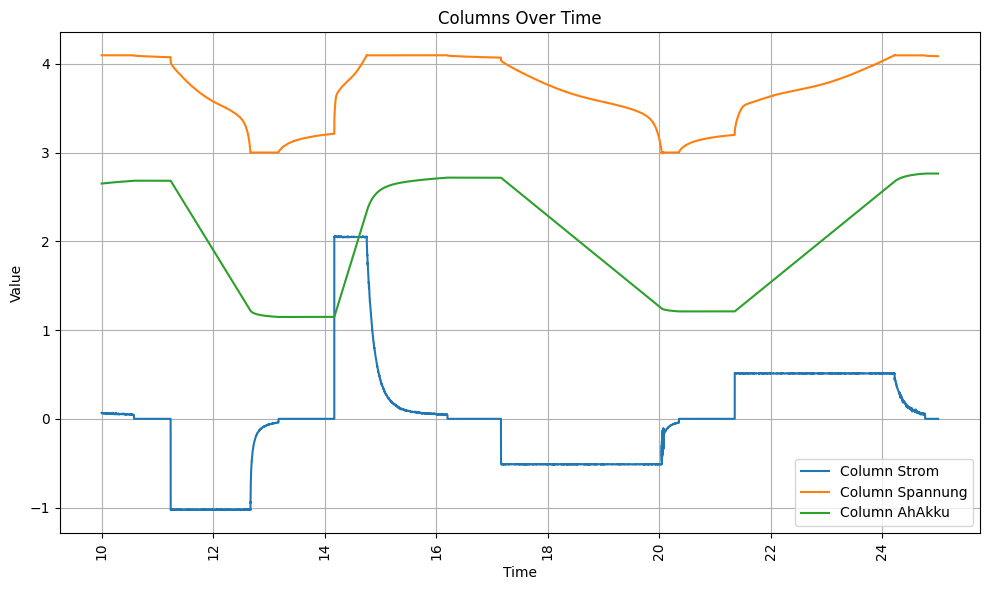

Graph No. : 16


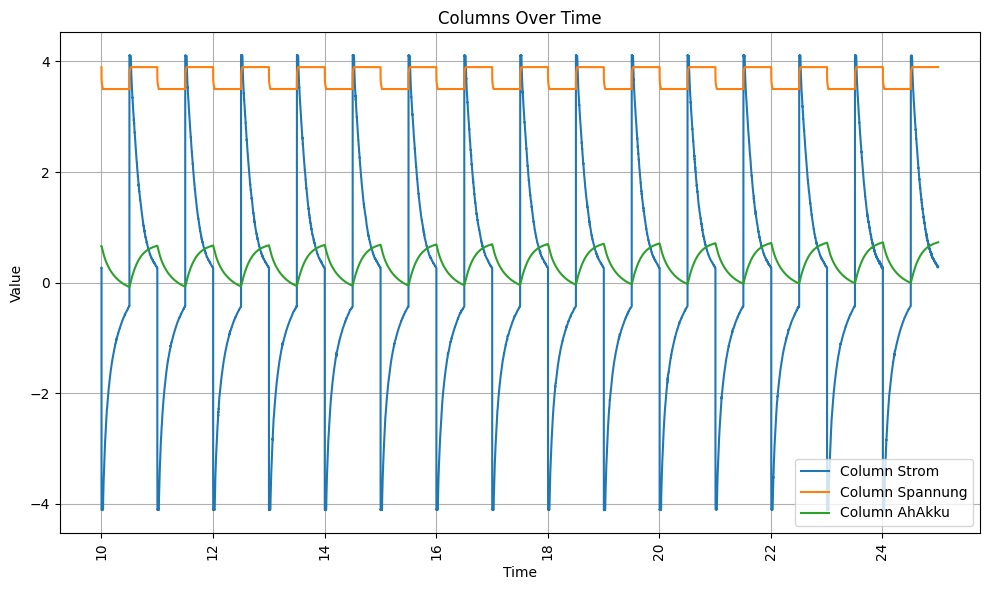

Graph No. : 17


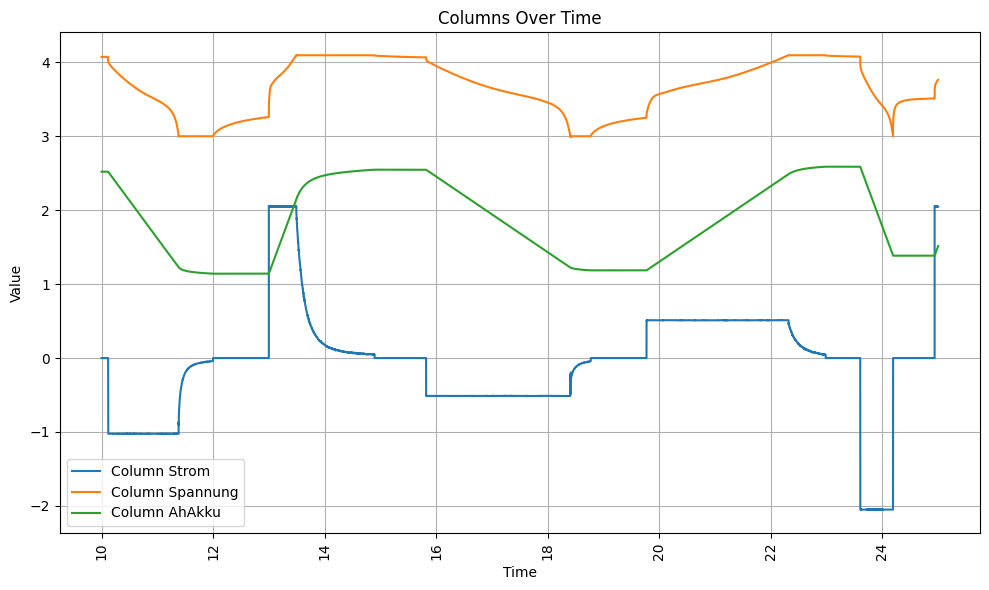

Graph No. : 18


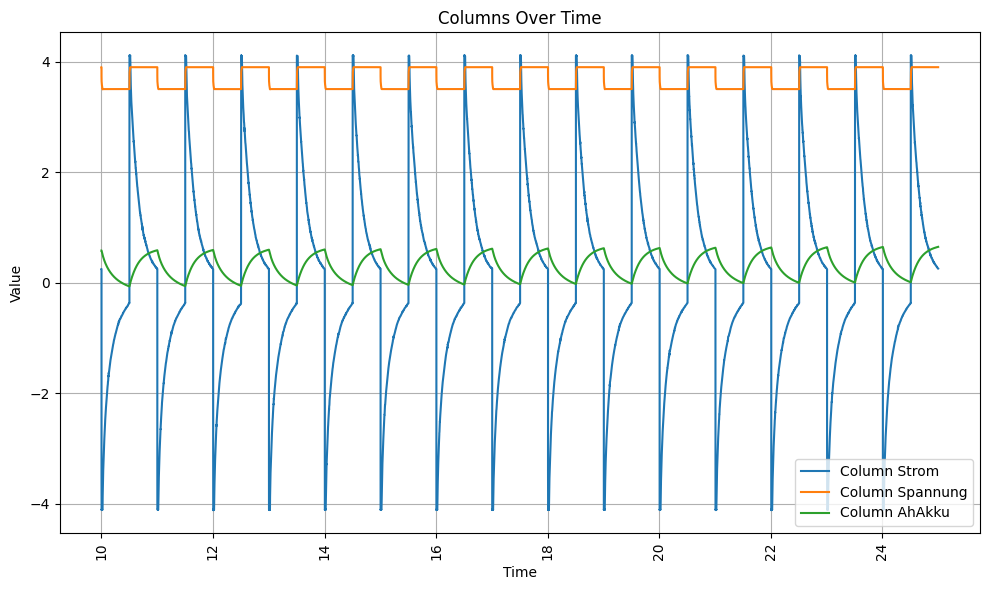

Graph No. : 19


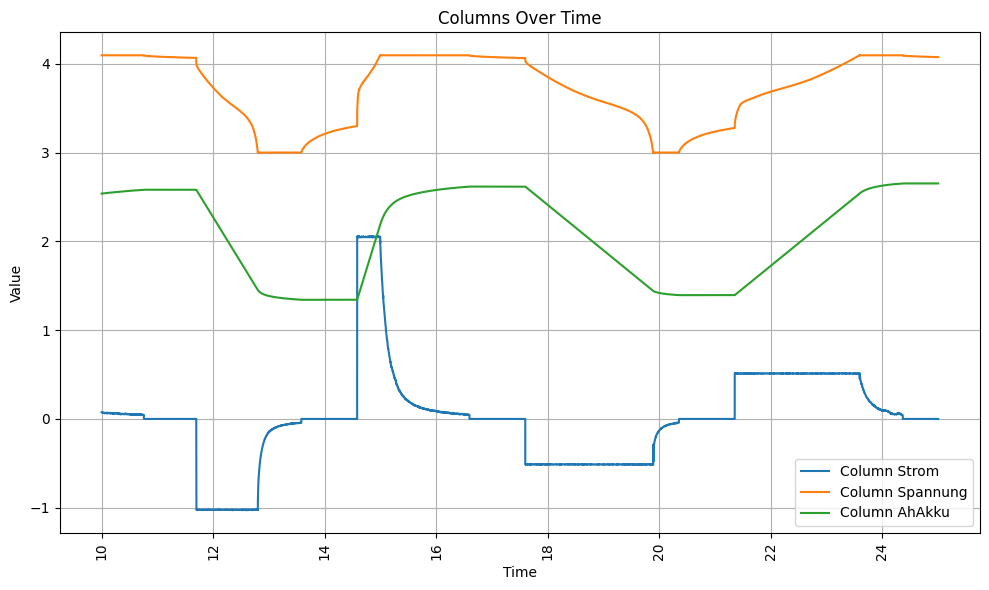

Graph No. : 20


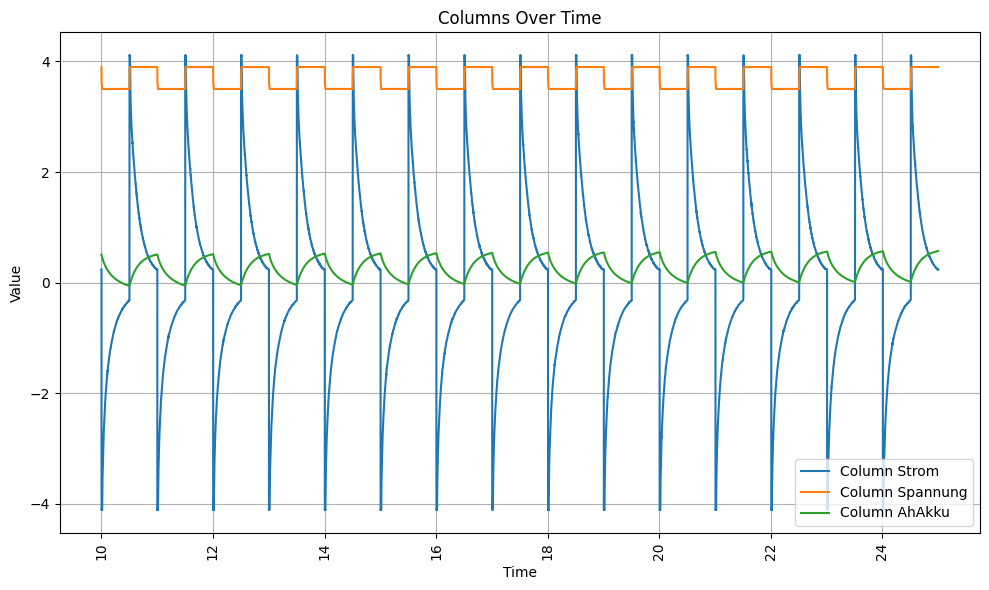

Graph No. : 21


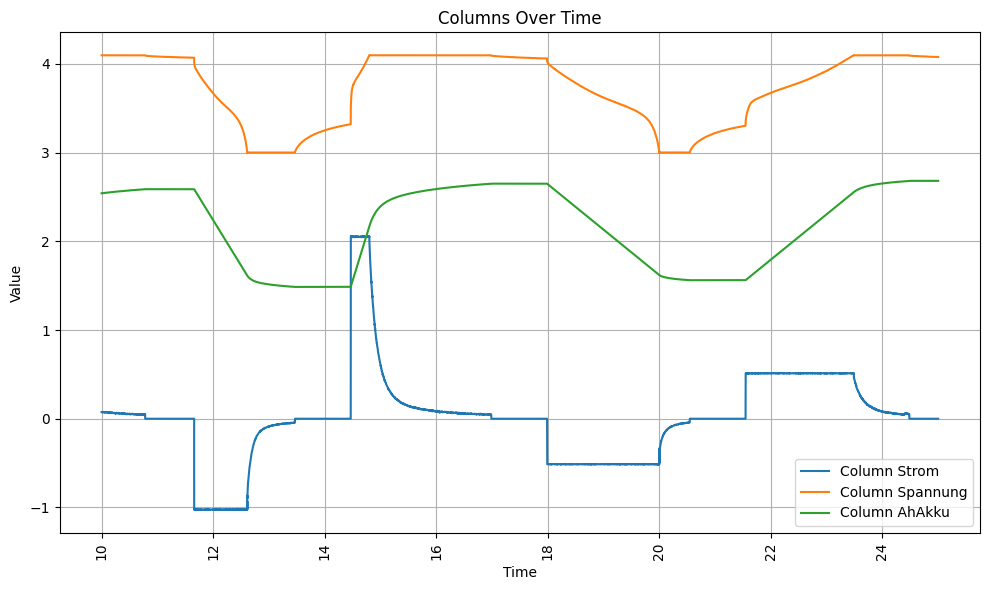

Graph No. : 22


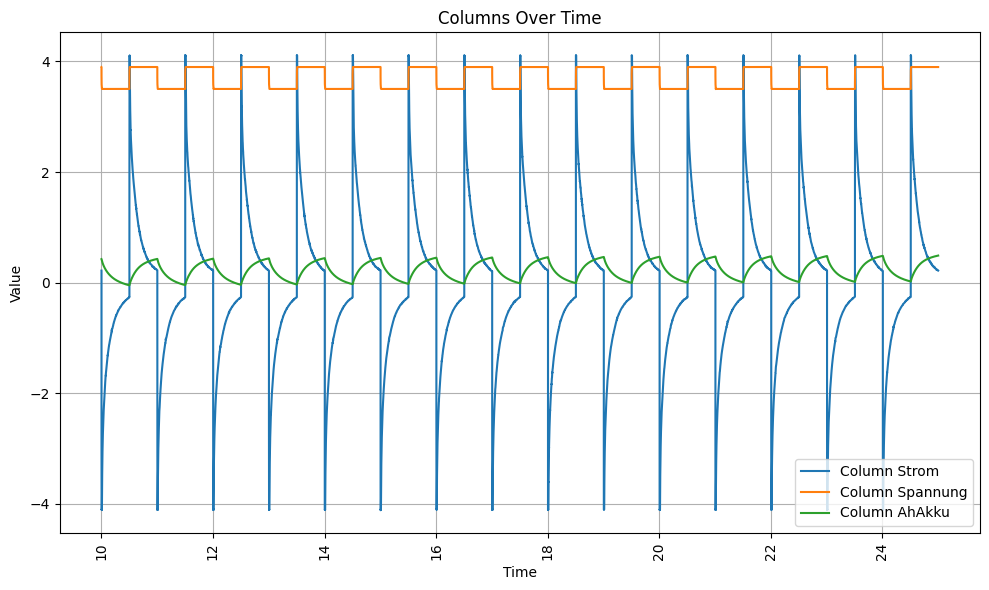

Graph No. : 23


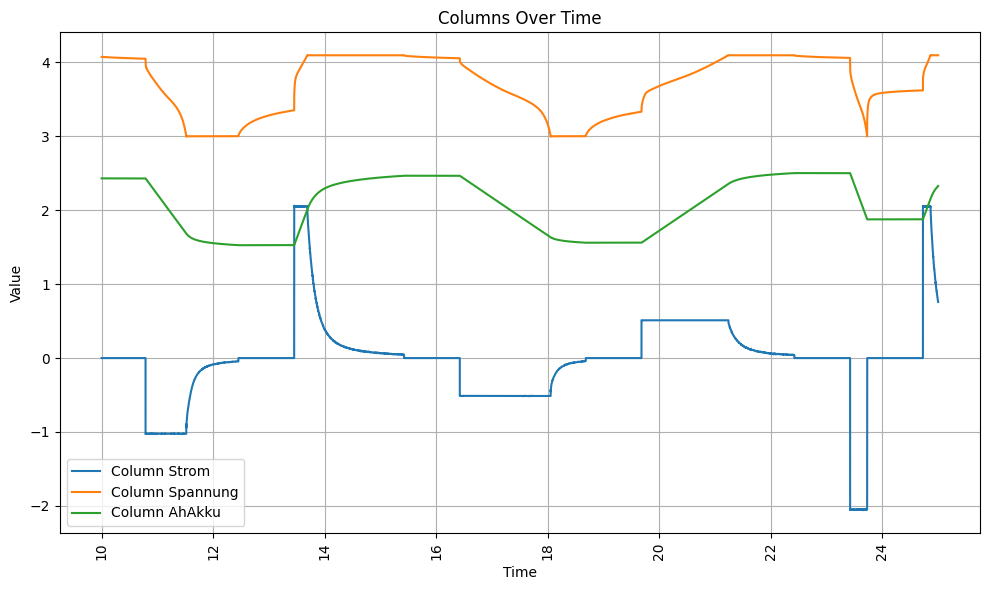

Graph No. : 24


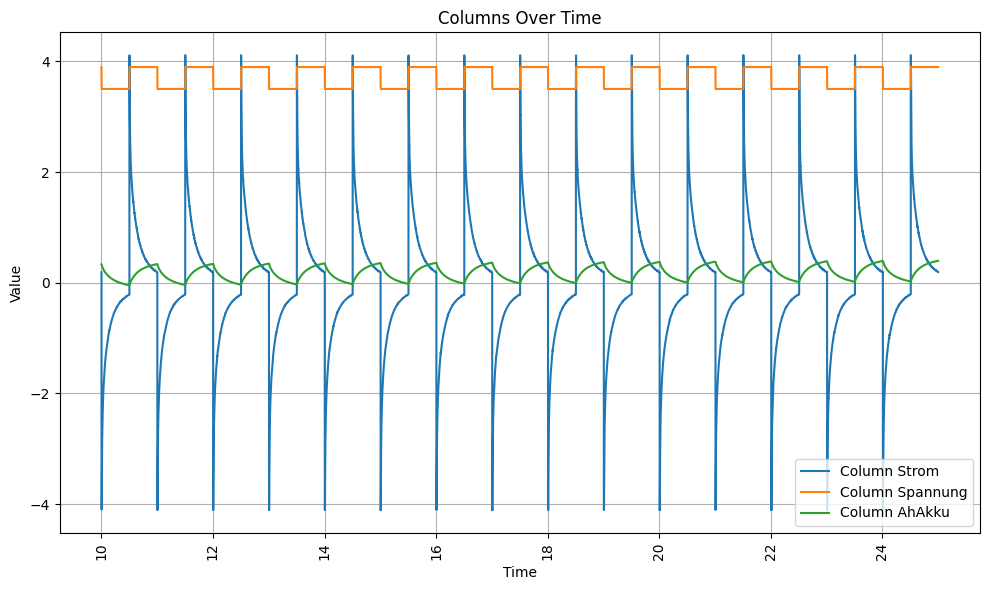

Graph No. : 25


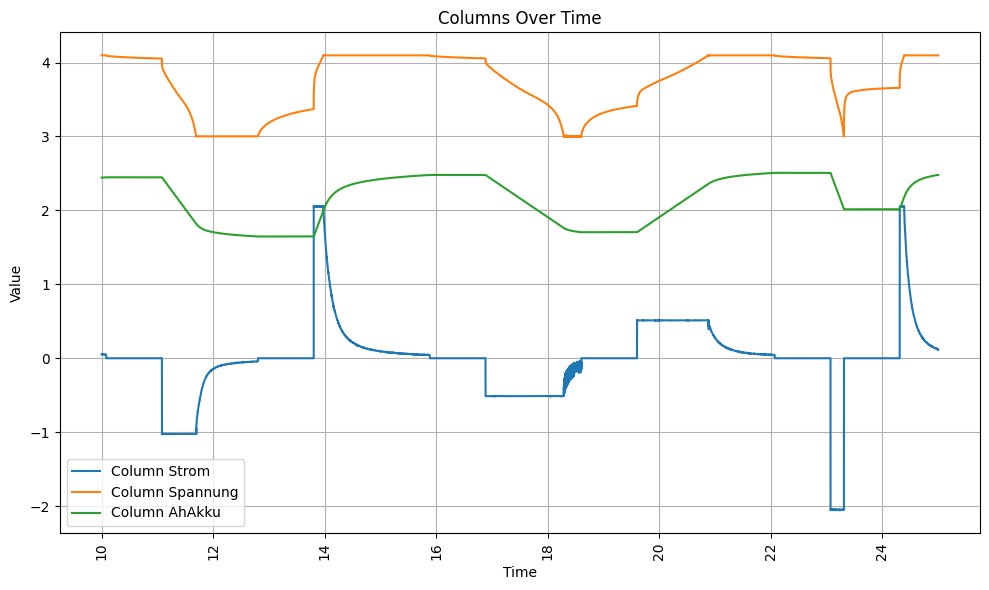

Graph No. : 26


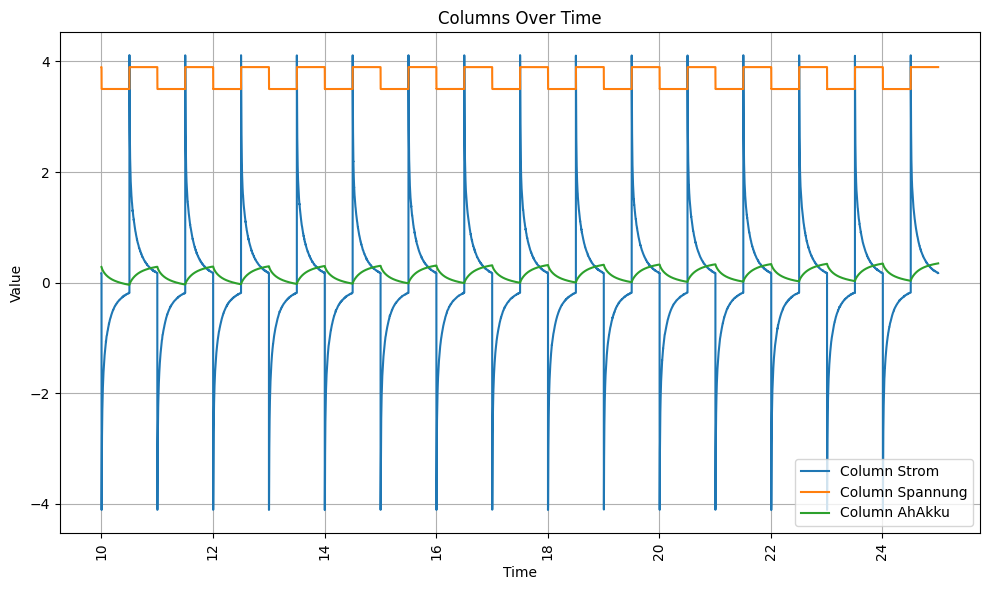

Graph No. : 27


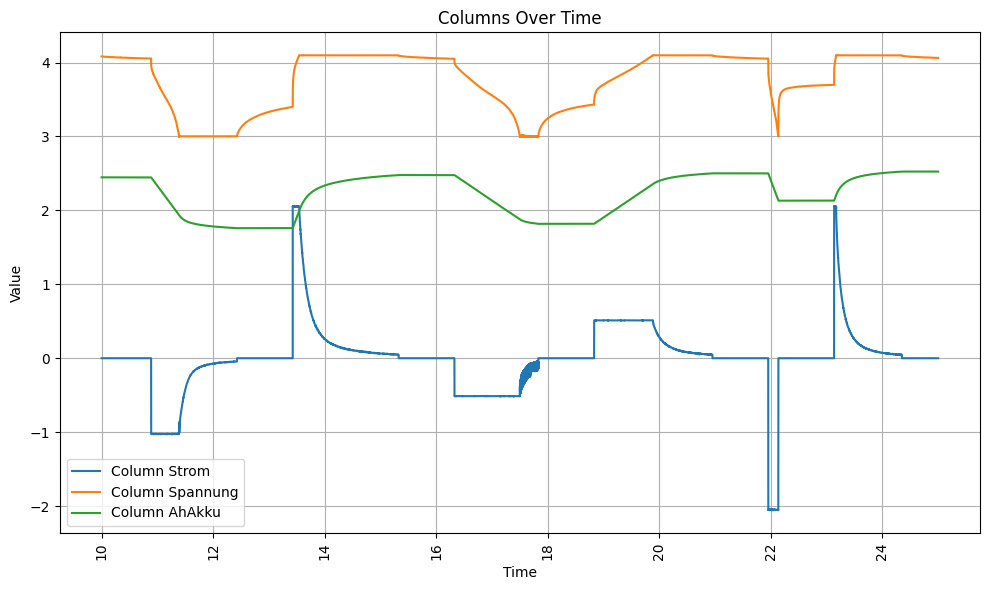

Graph No. : 28


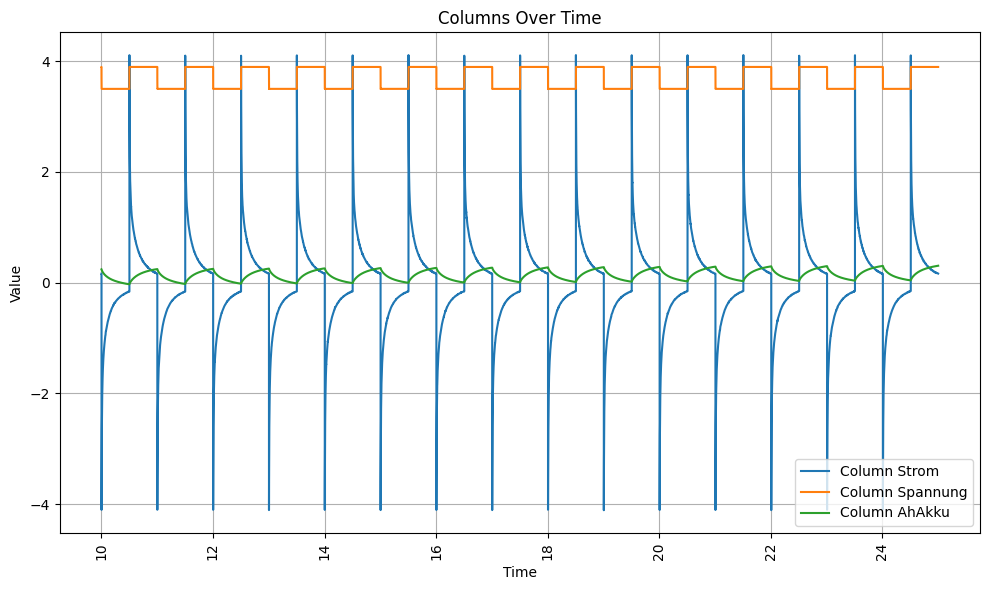

Graph No. : 29


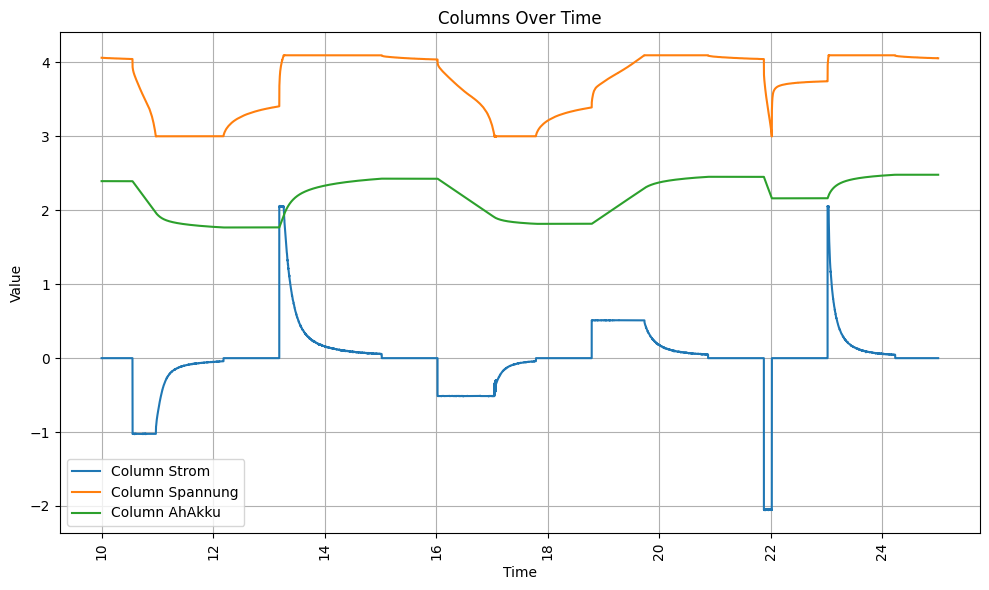

Graph No. : 30


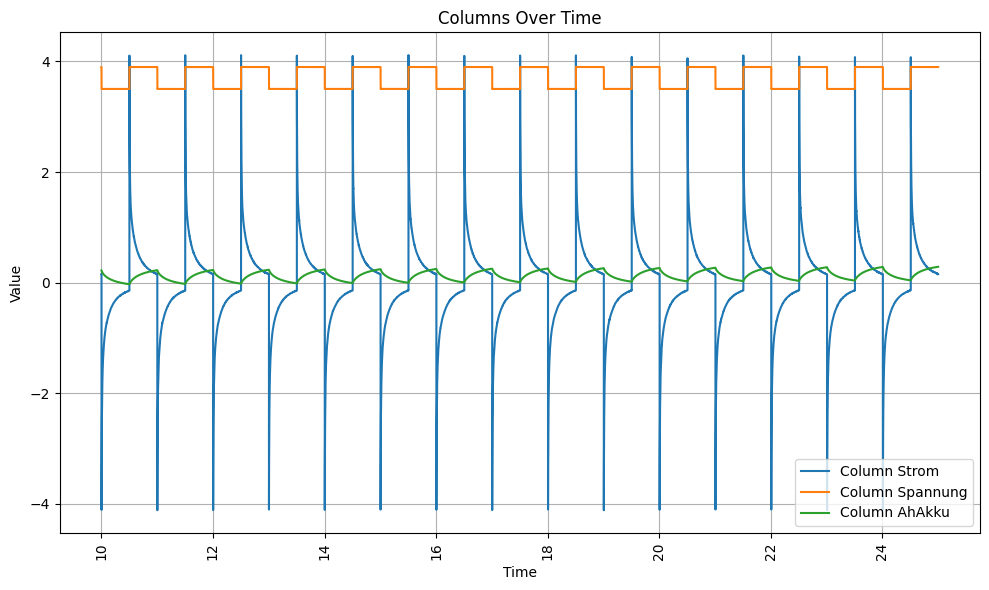

Graph No. : 31


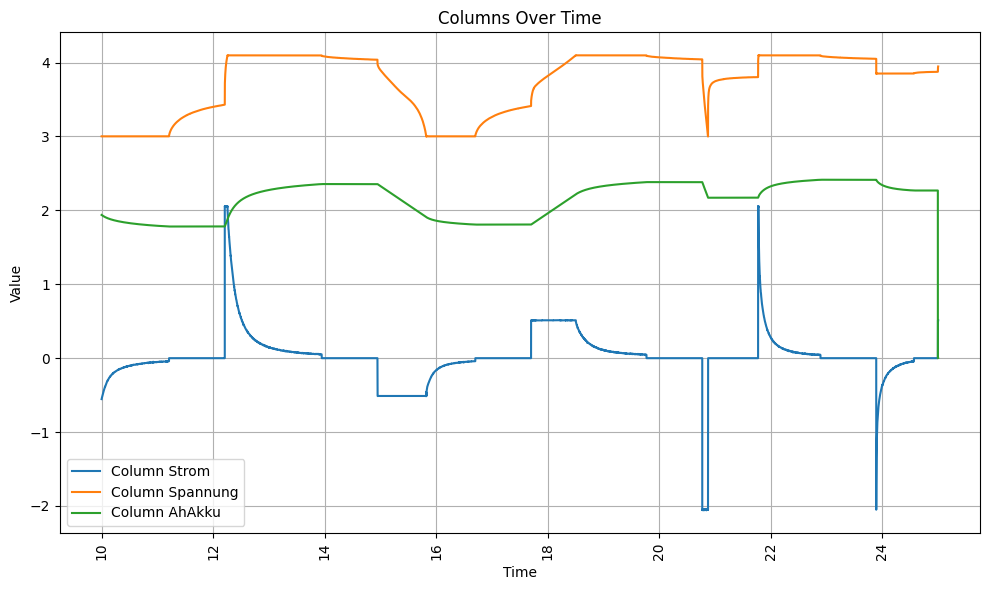

Graph No. : 32


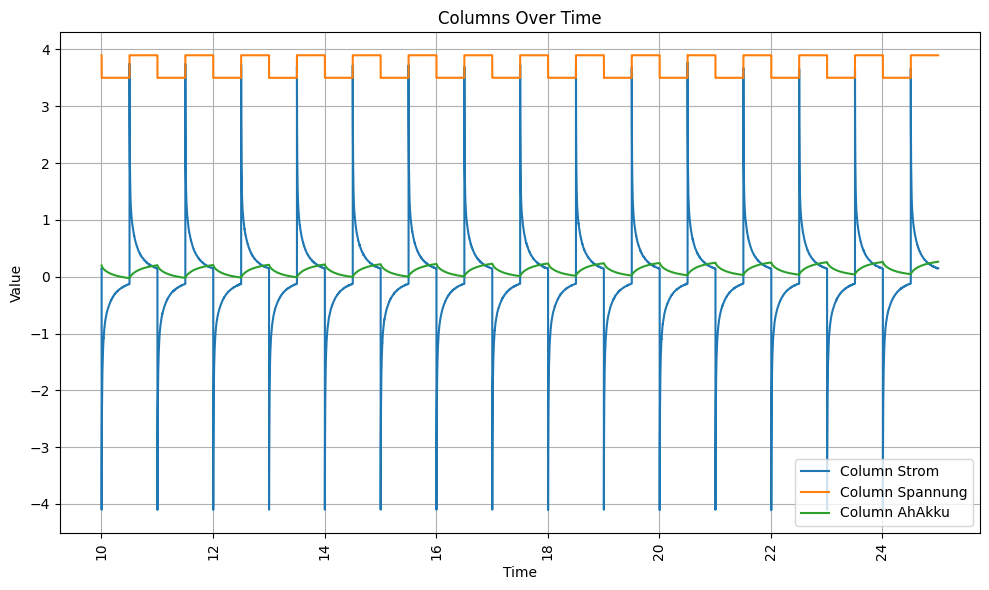

Graph No. : 33


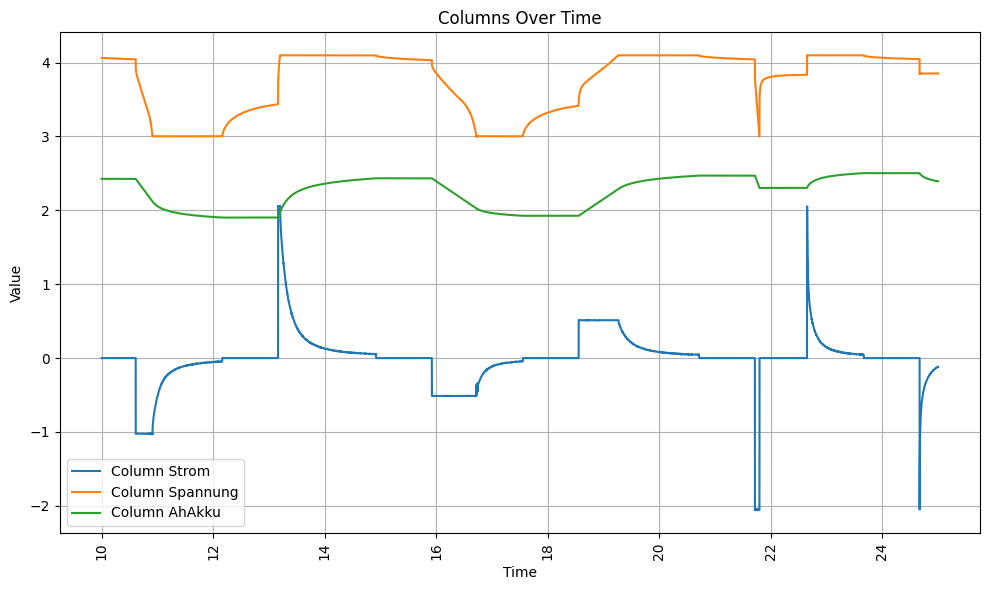

Graph No. : 34


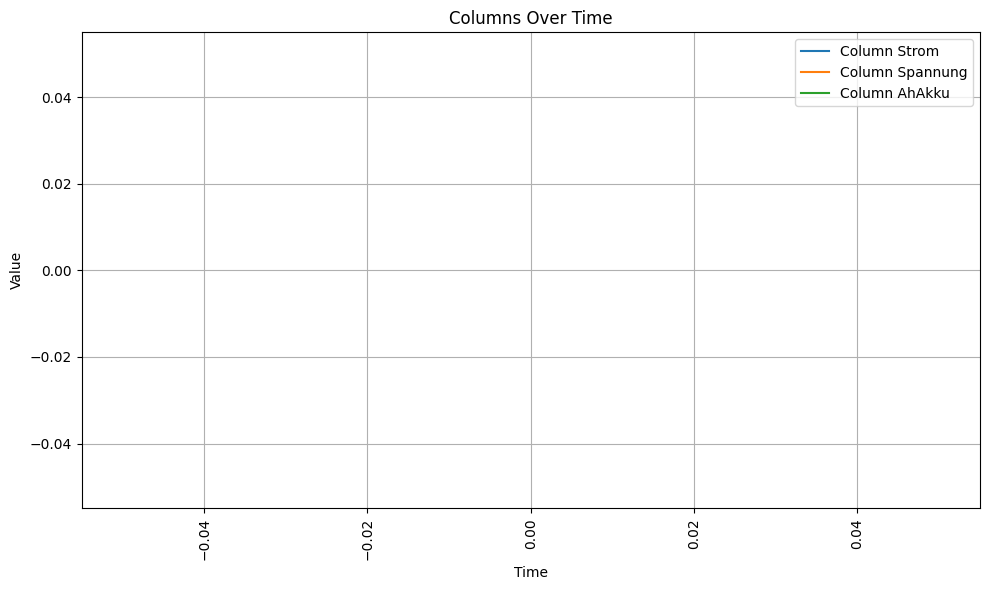

In [111]:
columns_to_plot = [16,15,9] 
#plotAllDates(dataframes[0],columns_to_plot)
I = 0
for i in dataframes:
    print("Graph No. :",I)
    #plot(columns_to_plot,dataframes[I])
    plot_threshold(columns_to_plot, dataframes[I], 10, 25)
    I=I+1

# 1 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [91]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in dataframes:
    max_values = max_threshold(columns_to_plot, df, 11, 21)
    min_values = min_threshold(columns_to_plot, df, 11, 21)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[0.9683542172942908], [2.512948733623489], [0.9527841760218508], [0.9379599587318808], [2.506704811101372], [0.901127865548915], [2.543738248838054], [0.8680787136136132], [2.538791181188572], [0.8457013399311109], [2.538695086757798], [3.259110481674725], [0.815837157992064], [2.546989368292998], [30.5], [2.718868245512567], [0.7114235212420681], [2.549460202593764], [0.63090901835767], [2.618374756268167], [0.5543623494704661], [2.650589085063984], [0.4703467295375958], [2.467536640364415], [0.3790578488665233], [2.479579816266778], [0.3316027143587235], [2.501187635407405], [0.2893884973977947], [2.453454201666318], [0.2699685657089503], [2.382412096023472], [0.2464290570976573], [2.470213039210648], [nan]]
[[-0.1521196222574872], [0.698714602887776], [-0.1030657887192774], [-0.108770648796849], [0.7646620331606755], [-0.0955465925229646], [0.7856070096895564], [-0.1021016168425604], [0.8125349584051946], [-0.0900104539817903], [0.8460636535046433], [1.562708852767173], [-0.0897345

### Extract Requried data
The extract contain the array of elements to plot for the calculation of capacity.

In [92]:
extract = [1,4, 6, 8, 10, 11, 13,15,17,19,21,23,25,27,29,31,33]

extracted_capacity_values = [capacity_values_list[i] for i in extract]
iteration_range = iteration_range = range(len(extracted_capacity_values))
print(extracted_capacity_values)
iteration_range

[1.8142341307357128, 1.7420427779406964, 1.7581312391484976, 1.7262562227833773, 1.6926314332531547, 1.696401628907552, 1.6367908970505596, 1.5707891102210847, 1.407663991740265, 1.275981104865422, 1.164520698672276, 0.9400738787917358, 0.8325559669392528, 0.7422148674049822, 0.685742623618353, 0.6009614617378238, 0.5685785968416888]


range(0, 17)

### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

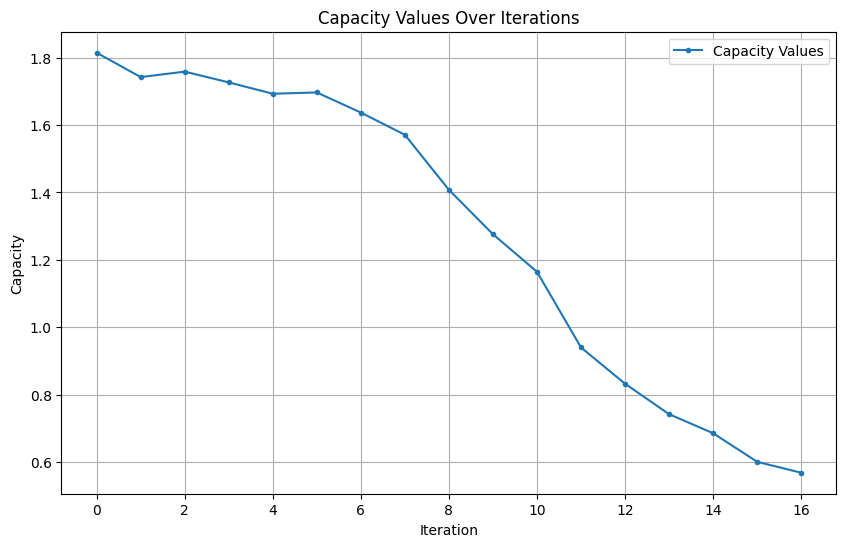

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [94]:
import csv

csv_filename = "extracted_capacity_values.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

Values have been appended to the CSV file 'extracted_capacity_values.csv'


### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

In [ ]:
csv_file = 'extracted_capacity_values.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 2 Volatge analysis

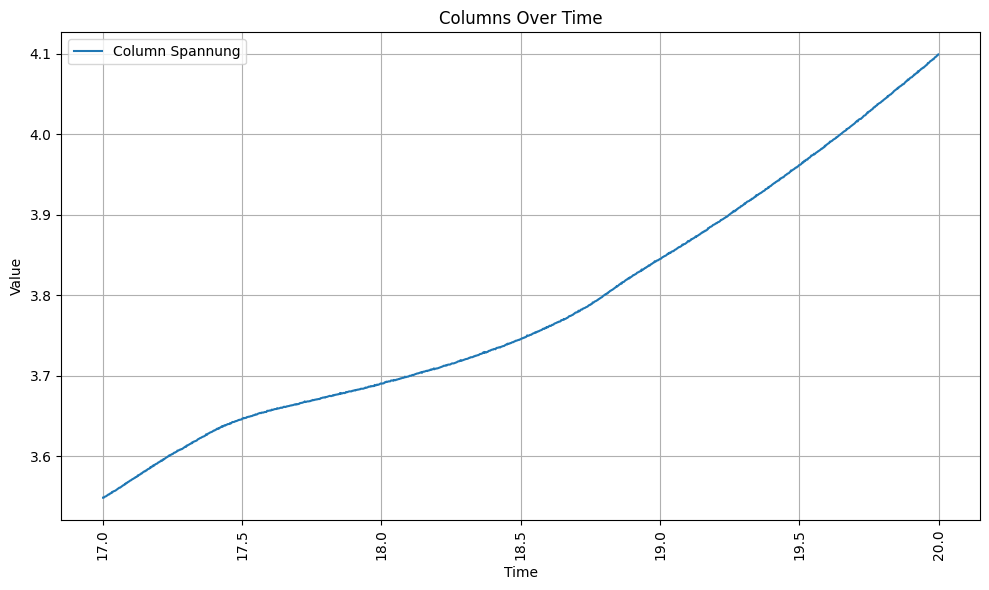

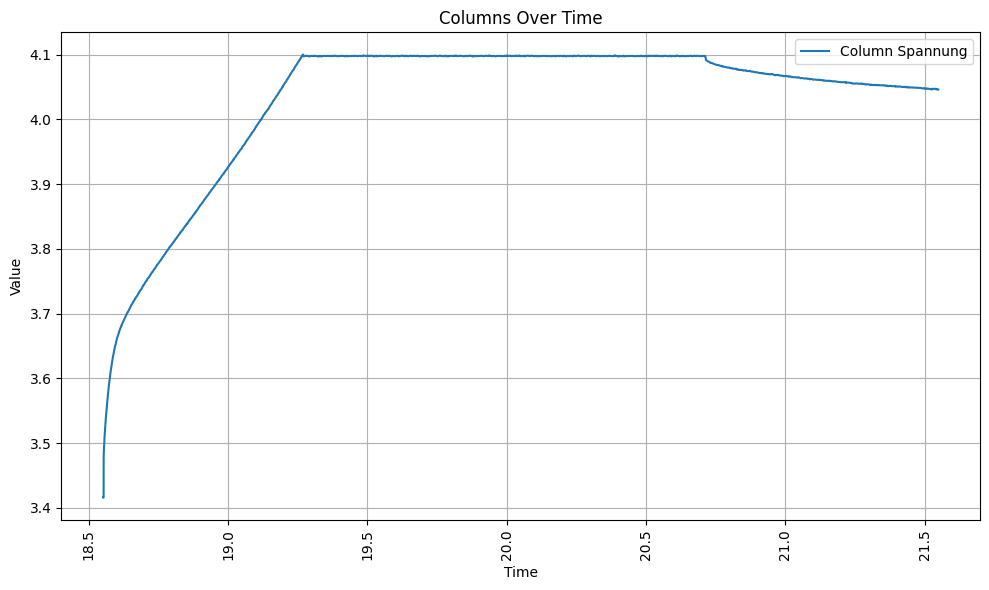

In [118]:
columns_to_plot = [15] 
#plotAllDates(dataframes[0],columns_to_plot)
plot_threshold(columns_to_plot, dataframes[1], 17, 20)
plot_threshold(columns_to_plot, dataframes[33], 18.55, 21.55)
I = 0
for i in dataframes:
    #print("Graph No. :",I)
    #plot(columns_to_plot,dataframes[I])
    #plot_threshold(columns_to_plot, dataframes[I], 16, 20)
    I=I+1